# Árboles de decisión

Es un modelo que clasifica o predice siguiendo reglas en forma de árbol, como un diagrama de preguntas:
- ¿alcohol>13? -> sí: predice clase A, no: sigue otra rama.
- Cada nodo representa una condición sobre una variable.
- Cada hoja representa una predicción final (clase o valor).

## Ventajas
- Fácil de interpretar.
- Maneja datos categóricos y numéricos.
- No necesita escalado (no depende de magnitudes).
- Puede moldear relaciones no lineales.

## Desventajas
- Puede sobreajustar si no se limita la profundidad.
- Sensible a cambios en los datos.
- Menor rendimiento frente a ensambles (Random Forest, XGBoost).

## Hiperparámetros clave de `DesicionTreeClassifier`
- `criterion`: mide la calidad de la división.
    - `"gini"` (default): impureza de Gini.
    - `"entropy"`: informacion ganada (basado en entropía).
- `max_depth`: profundidad máxima del árbol. Controla overfitting.
- `min_samples_split`: n° mínimo de muestras para dividir un nodo.
- `min_samples_leaf`: n° mínimo de muestras en una hoja.
- `max_features`: n° de features a considerar en cada división.

## ¿Qué es "impureza" en un nodo?
Un nodo tiene una mezcla de clases.
- Nodo puro: todas las muestras son de una sola clase -> impureza = 0.
- Nodo impuro: hay varias clases mezcladas -> impureza > 0. Los árboles buscan dividir los datos para reducir la impureza lo mas posible.

## Índice de Gini
$ Gini=1-\displaystyle\sum p_k^2$
-$p_k$: proporción de muestras de la clase $k$ en el nodo.
- Interpretación: probabilidad de equivocarse si asignas clase al azar.

Ejemplo (2 clases):
- 100% clase A -> Gini = 0 (puro)
- 50% A y 50% B -> Gini = 0.5 (máxima mezcla)
- 80% A y 20% B -> Gini = 0.32 (casi puro)

## Entropía (información)
$Entropy=-\displaystyle\sum p_k log_2(p_k)$
- Interpretación: mide la incertidumbre
- Valores:
    - 0 si el nodo es puro.
    - Máxima cuando las clases estan equilibradas.

Ejemplo (2 clases):
- 100% clase A -> Entropía = 0
- 50% A y 50% B -> Entropía = 1 (máxima incertidumbre)
- 80% A y 20% B -> Entropía = 0.72 (menos mezcla)

## Ejemplo - Dataset Wine
Entrenar y evaluar árbol de decisión

Reporte de clasificación:
               precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

Matriz de confusión:
 [[17  1  0]
 [ 0 21  0]
 [ 0  1 14]]


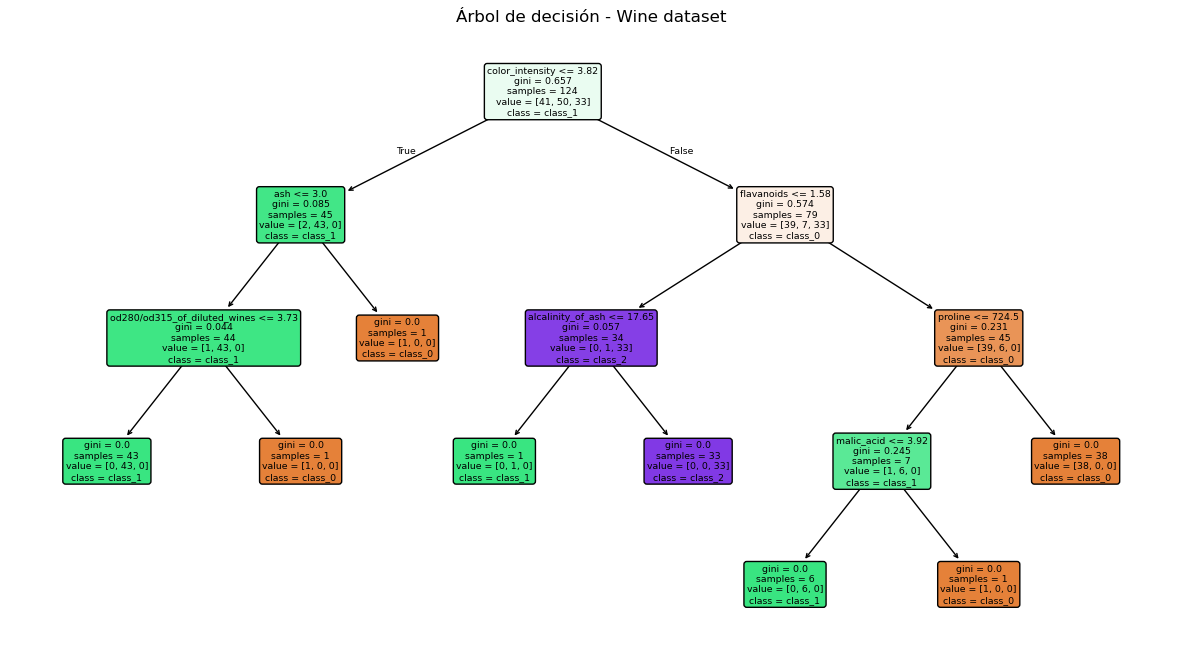

In [3]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

wine = load_wine()
X, y = wine.data, wine.target
target_names = wine.target_names

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

clf = DecisionTreeClassifier(
    criterion="gini",   # o entropy
    max_depth=4,        # límite de profundidad para evitar sobreajuste
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n", classification_report(y_test,y_pred, target_names=target_names ))
print("Matriz de confusión:\n", confusion_matrix(y_test,y_pred))

plt.figure(figsize=(15,8))
plot_tree(clf, filled=True, feature_names=wine.feature_names, class_names=wine.target_names, rounded=True)
plt.title("Árbol de decisión - Wine dataset")
plt.show()


Cada nodo muestra:
- Condición de división (ej. `proline <= 755.5`)
- Gini o entropía (impureza)
- N° de muestras en ese nodo
- Distribución de clases
- Cñase predicha

## Tarea - Dataset Iris
1. Entrena un `DecisionTreeClassifier` con `criterion="entropy"` y `max_depth=3`.
2. Evalua con `classification_report` y ``confusion_matrix`.
3. Grafica el árbol con `plot_tree`.
4. Comenta: ¿que features aparecen primero en las divisiones y por qué crees que son importantes.

Reporte de clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

Matriz de confusión:
 [[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


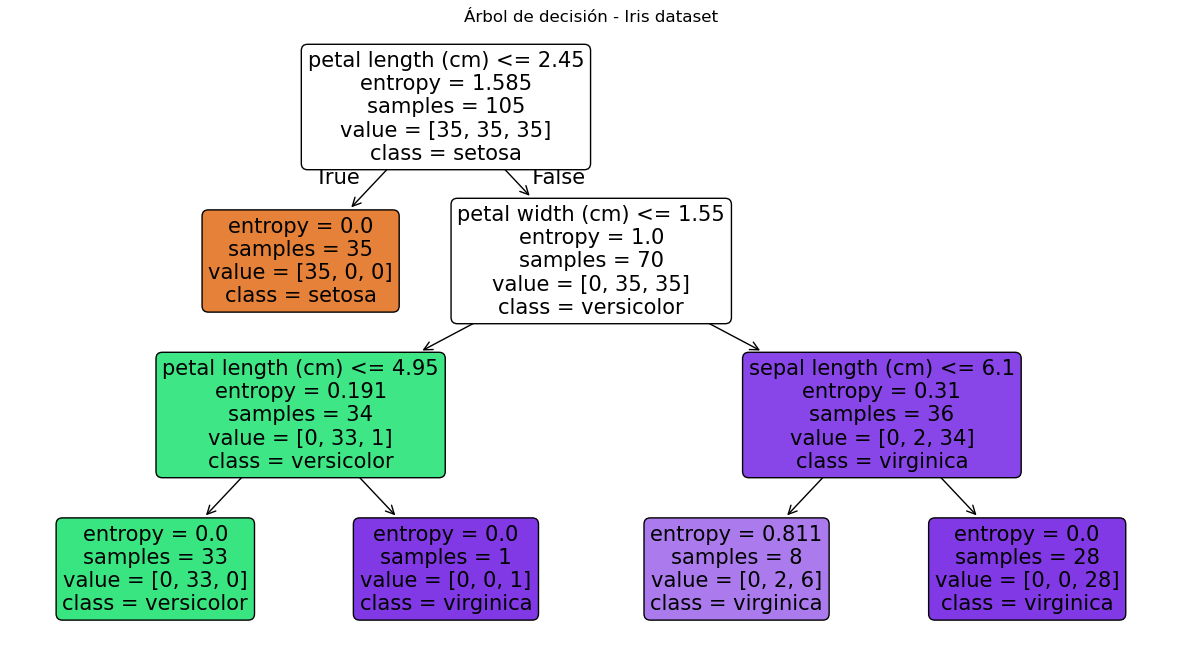

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
#1. 
iris = load_iris()
X, y = iris.data, iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,
    random_state=42
)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
#2.
print("Reporte de clasificación:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
#3.
plt.figure(figsize=(15,8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Árbol de decisión - Iris dataset")
plt.show()


4. petal lenght, porque es el feature con mayor ganancia de informacion,